<a href="https://colab.research.google.com/github/AshishPandey88/Climate-Change--Machoi-Glacier-Loss/blob/main/Machoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.io import imread, imshow
import numpy as np
from skimage.future import graph
from skimage import segmentation, color, filters,io,data
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os
from skimage.filters import threshold_multiotsu

In [ ]:
##Get the image names
from google.colab import drive
image_name=[image_name for image_name in os.listdir('/content/Machoi_Glacier')]
image_name.sort()

In [ ]:
image_name

['1984.jpg', '1995.jpg', '2005.jpg', '2010.jpg', '2015.jpg', '2021.jpg']

In [ ]:
folder='/content/Machoi_Glacier'

In [ ]:
##Get the path to every image
image_path=[]
for i in image_name:
  image_path.append(folder+'//'+i)

In [ ]:
image_path

['/content/Machoi_Glacier//1984.jpg',
 '/content/Machoi_Glacier//1995.jpg',
 '/content/Machoi_Glacier//2005.jpg',
 '/content/Machoi_Glacier//2010.jpg',
 '/content/Machoi_Glacier//2015.jpg',
 '/content/Machoi_Glacier//2021.jpg']

In [ ]:
##Load image
image=[]
for i in image_path:
  img=load_img(i)
  img=img_to_array(img)
  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  image.append(img)

In [ ]:
 img = np.vstack(image)

In [ ]:
img.shape

(6, 914, 1374, 3)

In [ ]:
title=['Year-1984', 'Year-1995', 'Year-2005', 'Year-2010', 'Year-2015','Year-2021']

In [ ]:
gimg=color.rgb2gray(img)

In [ ]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(gimg[4],classes=4)

In [ ]:
thresholds

array([ 62.25586, 127.00195, 198.7207 ], dtype=float32)

In [ ]:
# Using the threshold values, we generate the 4 regions.
regions = np.digitize(gimg, bins=thresholds)

In [ ]:
#Calculate the glacier cover %age
glacier_cover=[]
for i in range(img.shape[0]):
  glacier_cover.append((round(np.count_nonzero(regions[i]==3)/(regions[i].shape[0]*regions[i].shape[1]),2)))

In [ ]:
print("max cluster number {}, min cluster number {}".format(regions[0].max(),regions[0].min()))

max cluster number 3, min cluster number 0


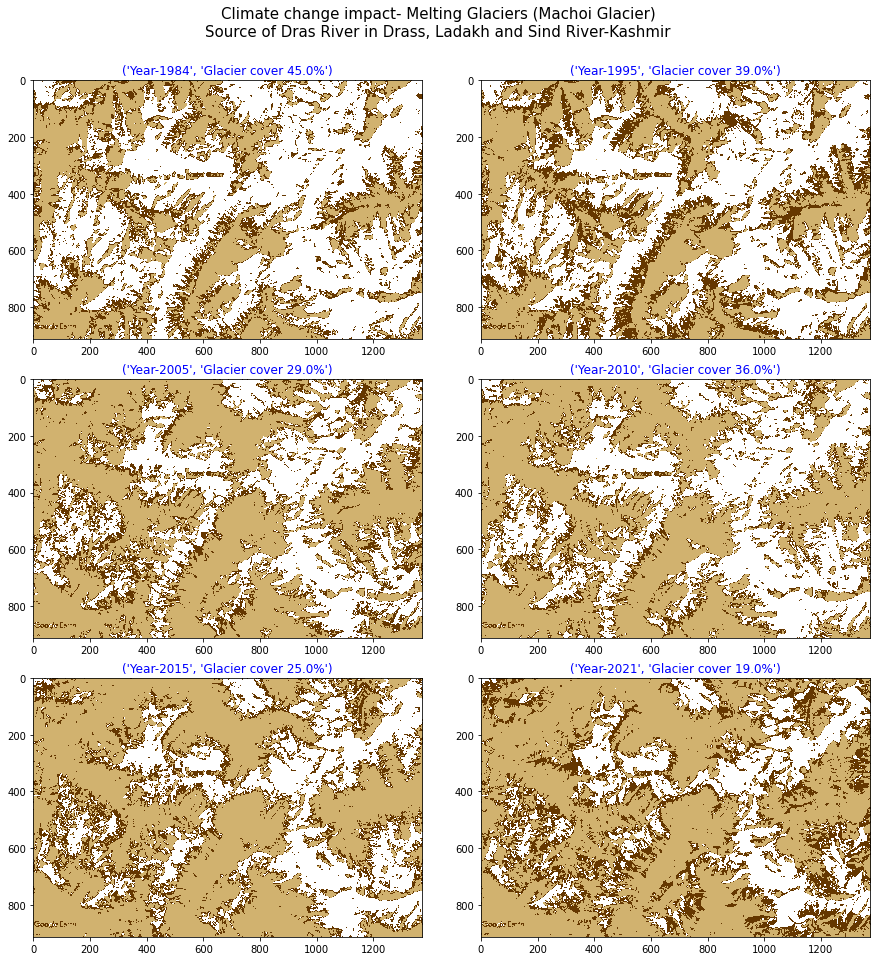

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig, ax=plt.subplots(3,2,figsize=(15,15))
fig.suptitle('Climate change impact- Melting Glaciers (Machoi Glacier)\nSource of Dras River in Drass, Ladakh and Sind River-Kashmir', fontsize=15)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.1,top=0.93)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in range(len(glacier_cover)):
        ax[i].set_title((title[i],'Glacier cover {}%'.format(round(glacier_cover[i]*100,2))), color='blue')
        ax[i].imshow(regions[i], cmap=ListedColormap(["xkcd:tan","xkcd:tan","xkcd:brown","white"]))
        
io.show()